In [1]:
from init import *
from helpers_analyses import *


Getting english data
Getting french data
Getting emotion words and bird names
number of overlapping words between Leuven and Rosch: 25
correlation between Leuven and Rosch ratings: (0.9519771567894879, 2.5885716906113406e-13)


In [3]:
# do some analysis on prototypicality ratings and time
from helpers_HTE import *

_, first_emotion = get_senses(HTE_senses % ('n', TABLE1_1987), words_eng, 1890)
_, first_leuven = get_senses(HTE_senses % ('n', LEUVEN), words_leuven, 1890)
_, first_rosch = get_senses(HTE_senses % ('n', ROSCH_1975), words_rosch, 1890)

words_eng = list(set(words_eng) & set(first_emotion.keys()))
words_leuven = list(set(words_leuven) & set(first_leuven.keys()))
words_rosch = list(set(words_rosch) & set(first_rosch.keys()))

s = 'Pearson correlation between first record and prototypicality: r = %f, p-value = %f, n = %d'
print('Emotion, ' + s % corr_proto_HTE(words_eng, first_emotion, proto))
print('Leuven, ' + s % corr_proto_HTE(words_leuven, first_leuven, proto_leuven))
print('Rosch, ' + s % corr_proto_HTE(words_rosch, first_rosch, proto_rosch))



Emotion, Pearson correlation between first record and prototypicality: r = -0.366168, p-value = 0.000013, n = 135
Leuven, Pearson correlation between first record and prototypicality: r = 0.106510, p-value = 0.575352, n = 30
Rosch, Pearson correlation between first record and prototypicality: r = 0.065745, p-value = 0.643313, n = 52


English
seeds: ['love', 'anger', 'hate', 'fear', 'depression']
seeds: ['love', 'anger', 'hate', 'fear', 'depression']
seeds: ['love', 'anger', 'hate', 'fear', 'depression']
seeds: ['love', 'anger', 'hate', 'fear', 'depression']
seeds: ['love', 'anger', 'hate', 'fear', 'depression']
seeds: ['love', 'anger', 'hate', 'fear', 'depression']
seeds: ['love', 'anger', 'hate', 'fear', 'depression']
seeds: ['love', 'anger', 'hate', 'fear', 'depression']
seeds: ['love', 'anger', 'hate', 'fear', 'depression']
seeds: ['love', 'anger', 'hate', 'fear', 'depression']
seeds: ['love', 'anger', 'hate', 'fear', 'depression']
French
seeds: ['joie', 'émotion', 'amour', 'peur', 'passion']
seeds: ['joie', 'émotion', 'amour', 'peur', 'passion']
seeds: ['joie', 'émotion', 'amour', 'peur', 'passion']
seeds: ['joie', 'émotion', 'amour', 'peur', 'passion']
seeds: ['joie', 'émotion', 'amour', 'peur', 'passion']
seeds: ['joie', 'émotion', 'amour', 'peur', 'passion']
seeds: ['joie', 'émotion', 'amour', 'peur', 'passi

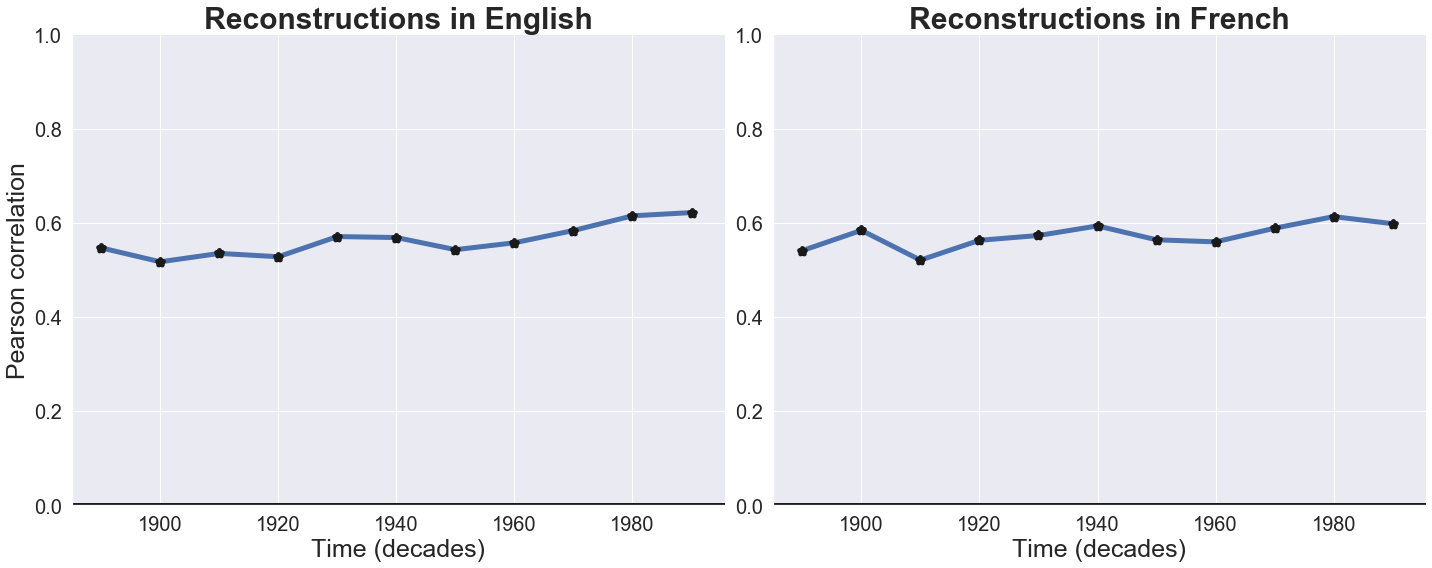

In [4]:
# reconstruction over time
time_range = list(range(1800, 2000, 10))
def get_reconstruction_stats(t1, t2, seeds, words, vectors, proto, time_range=time_range):
    ret_stats = []
    for t in range(t1, t2):
        p, e = estimate_proto(seeds, words, vectors, proto, t=t, seed_num=5)
        r, pval = pearsonr(p, e)
        ret_stats.append({
            'time': time_range[t],
            'r': r,
            'pval': pval,
            'n': len(p)
        })
    return ret_stats
        
def plot_reconstruction_across_time(ax, t1, t2, seeds, words, vectors, proto, time_range=time_range):
    corrs, pvals = [], []
    for t in range(t1, t2):
        p, e = estimate_proto(seeds, words, vectors, proto, t=t, seed_num=5)
        r, pval = pearsonr(p, e)
        corrs.append(r)
        pvals.append(pval)
        if pval < 0.05 / len(range(t1, t2)):
            ax.scatter(time_range[t], r, marker='*', color='k', linewidth=5, zorder=5)
    ax.plot(time_range[t1:t2], corrs, linewidth=5)
    ax.axhline(y=0, color='k', linewidth=5)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    ax.set_ylim(0,1)
    ax.set_xlabel('Time (decades)', fontsize=25)
    ax.set_ylabel('Pearson correlation', fontsize=25)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    return ax
    
t1, t2 = 9, 20
print('English')
eng_stats = get_reconstruction_stats(t1, t2, eng_seeds, words_eng, data, proto)
print('French')
fra_stats = get_reconstruction_stats(t1, t2, fra_seeds, words_fr, data_fr, proto_fr)
print('Leuven')
leuven_stats = get_reconstruction_stats(t1, t2, leuven_seeds, words_leuven, data, proto_leuven)
print('Rosch')
rosch_stats = get_reconstruction_stats(t1, t2, rosch_seeds, words_rosch, data, proto_rosch)

# plot stats across time
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(20, 8))
axes[0] = plot_reconstruction_across_time(axes[0], t1, t2, eng_seeds, words_eng, data, proto)
axes[1] = plot_reconstruction_across_time(axes[1], t1, t2, fra_seeds, words_fr, data_fr, proto_fr)
axes[0].set_title('Reconstructions in English', fontsize=30, weight='bold')
axes[1].set_title('Reconstructions in French', fontsize=30, weight='bold')
axes[1].set_ylabel('')
plt.tight_layout()
img_format = 'svg'
plt.savefig('images/figure_reconstruct_historical.'+img_format, format=img_format, bbox_inches='tight')

# create latex tables
emotion_stats = eng_stats
for i, emotion_stat in enumerate(emotion_stats):
    emotion_stat['r'] = '%.3g' % eng_stats[i]['r']
    emotion_stat['pval'] = '%.3g' % eng_stats[i]['pval']
    emotion_stat['r2'] = '%.3g' % fra_stats[i]['r']
    emotion_stat['pval2'] = '%.3g' % fra_stats[i]['pval']
    emotion_stat['n2'] = fra_stats[i]['n']
emotion_stats_df = pd.DataFrame(emotion_stats)
emotion_stats_df = emotion_stats_df.reindex(['time', 'r', 'pval', 'n', 'r2', 'pval2', 'n2'], axis=1)
print(emotion_stats_df.to_latex(index=False, column_format='||c | c | c | c | c | c | c||'))

bird_stats = rosch_stats
for i, bird_stat in enumerate(bird_stats):
    bird_stat['r2'] = leuven_stats[i]['r']
    bird_stat['pval2'] = leuven_stats[i]['pval']
    bird_stat['n2'] = leuven_stats[i]['n']
bird_stats_df = pd.DataFrame(bird_stats)
bird_stats_df = bird_stats_df.reindex(['time', 'r', 'pval', 'n', 'r2', 'pval2', 'n2'], axis=1)
print(bird_stats_df.to_latex(index=False, column_format='||c | c | c | c | c | c | c||'))

